In [32]:
using ReferenceFrameRotations
using Healpix
using Plots
using NPZ
using LinearAlgebra
using StatsBase
using BenchmarkTools
using PyCall
hp = pyimport("healpy")
np = pyimport("numpy")
plt = pyimport("matplotlib.pyplot")
using Base.Threads
using StatsPlots
using Formatting
using PyPlot
using StaticArrays
using Revise
using Falcons
using Interpolations
using FFTW
using WignerD
using HDF5

include("true_function.jl")

test_l_calculation_pol (generic function with 1 method)

In [2]:
nside = 32
lmax = 3nside -1
npix = nside2npix(nside)
res = Resolution(nside)
pointing_source = zeros(3, npix);

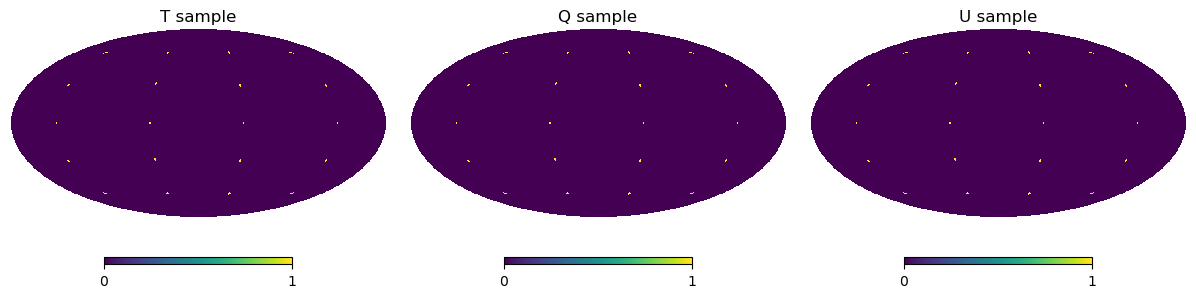

In [33]:
for theta in 30:30:150
    for phi in 45:90:360
        pix = ang2pixRing(res, deg2rad(theta), deg2rad(phi))
        pointing_source[1,pix] = 1
        pointing_source[2,pix] = 1
        pointing_source[3,pix] = 1
    end
end

plt.figure(figsize=[12, 8])
hp.mollview(pointing_source[1,:], sub = (1,3,1), title = "T sample")
hp.mollview(pointing_source[2,:], sub = (1,3,2), title = "Q sample")
hp.mollview(pointing_source[3,:], sub = (1,3,3), title = "U sample")

pointing_source_alm = hp.map2alm(pointing_source);

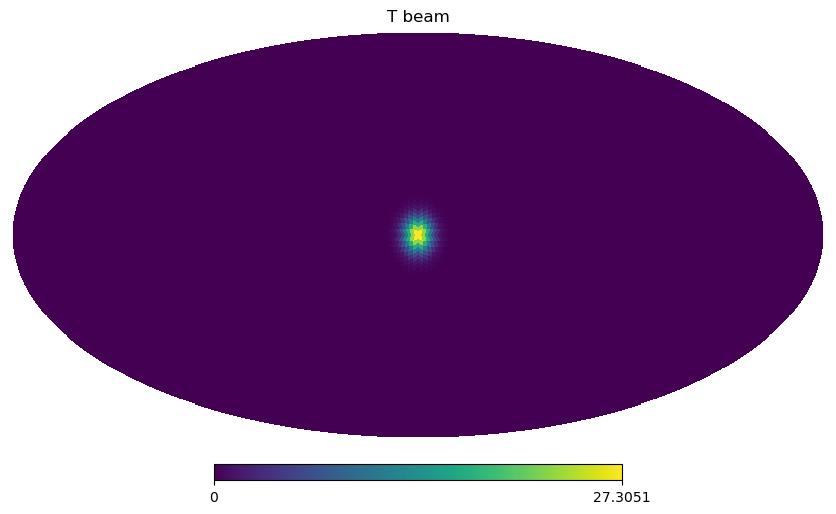

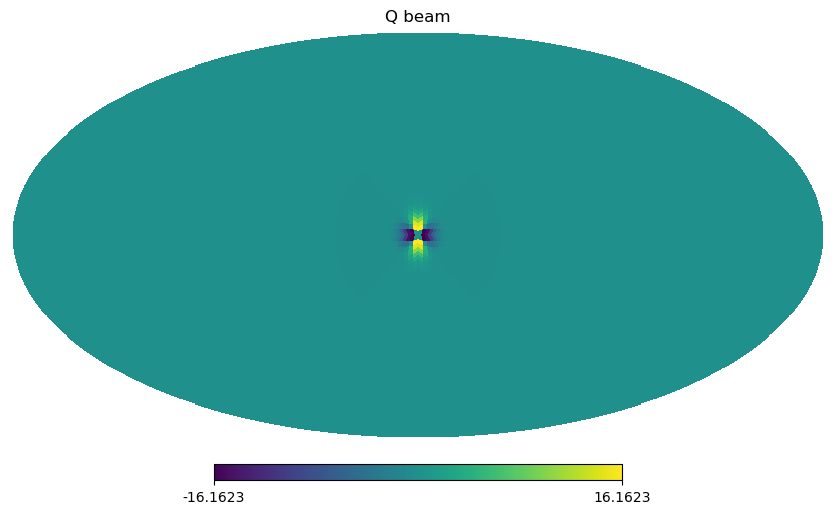

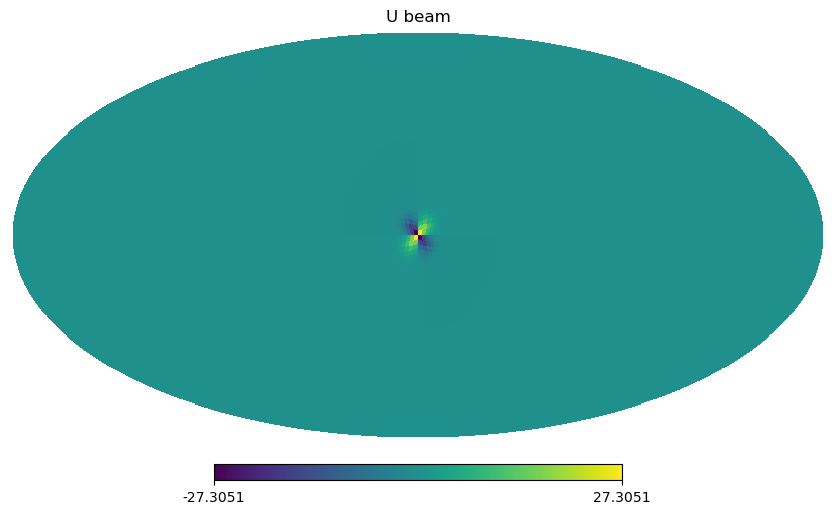

In [34]:
Gauss_T = gauss_3d_xyz(npix, deg2rad(10), 0.0, 0.0, 1)
Gauss_map = make_beam_TQU(Gauss_T, npix, res)
Gauss_blm = hp.map2alm(Gauss_map, pol=true)
hp.mollview(Gauss_map[1,:], title = "T beam", rot = (0,90))
hp.mollview(Gauss_map[2,:], title = "Q beam", rot = (0,90))
hp.mollview(Gauss_map[3,:], title = "U beam", rot = (0,90))

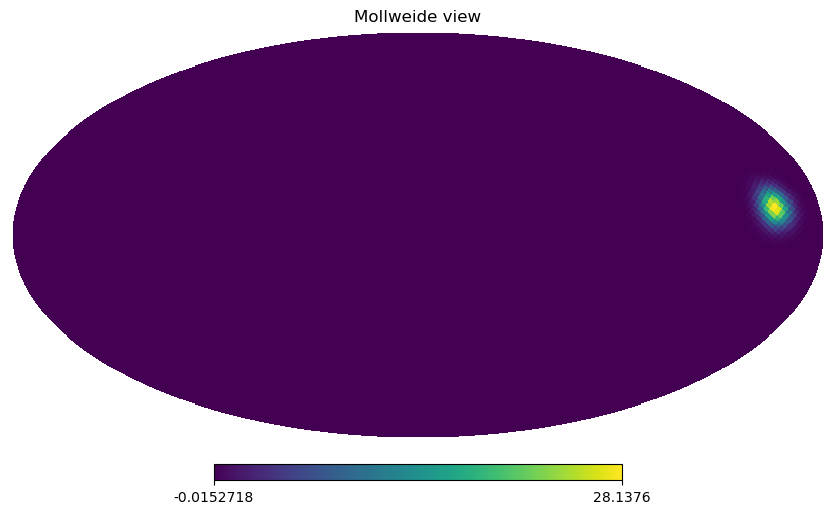

  0.399292 seconds (51.32 k allocations: 3.027 MiB)


In [24]:
θ = deg2rad(80)
φ = deg2rad(200)
ψ = deg2rad(67)

rotated_blm = @time rotater(lmax, θ, φ, ψ, Gauss_blm[1,:])
rotated_map = hp.alm2map(rotated_blm, nside=nside)
hp.mollview(rotated_map)

In [35]:
conved = test_l_calculation_pol(pointing_source_alm[2,:], pointing_source_alm[3,:], Gauss_blm[2,:], Gauss_blm[3,:], lmax, npix, 30)

l = 0
l = 1
l = 2
l = 3
l = 4
l = 5
l = 6
l = 7
l = 8
l = 9
l = 10
l = 11
l = 12
l = 13
l = 14
l = 15
l = 16
l = 17
l = 18
l = 19
l = 20
l = 21
l = 22
l = 23
l = 24
l = 25
l = 26
l = 27
l = 28
l = 29
l = 30


12288-element Array{Complex{Float64},1}:
     2.92931038115529e-5 + 3.24957534365465e-5im
    8.458739596635452e-5 + 8.020517017383356e-5im
     7.42470067599587e-5 + 0.00010648896458054506im
    9.018205280114257e-5 + 7.200522049180408e-5im
   0.0003228677570780486 - 0.0002667712831139713im
  -0.0002670222804103614 + 0.00030445689090905534im
   0.0005791800240527534 - 0.0003874794821002327im
 -0.00039480248200643843 + 0.0004608359651872676im
  0.00046305226910335525 - 0.00029327994288012106im
  -0.0003189784900227885 + 0.000472911816208016im
  0.00048574411584208064 - 0.00041095172374017543im
 -0.00040324696965909126 + 0.0005863213426530738im
   0.0004578978544816334 - 0.0006512934205316161im
                         ⋮
 -0.00042238655452724375 + 0.0005734059753182694im
   0.0005549951091492744 - 0.00042263755182362544im
 -0.00019098267078104987 + 0.00026548342969247047im
   0.0004365250317462818 - 0.00028900171946758793im
 -0.00021177516895564219 + 0.0002612101258058728im
   0.0002710

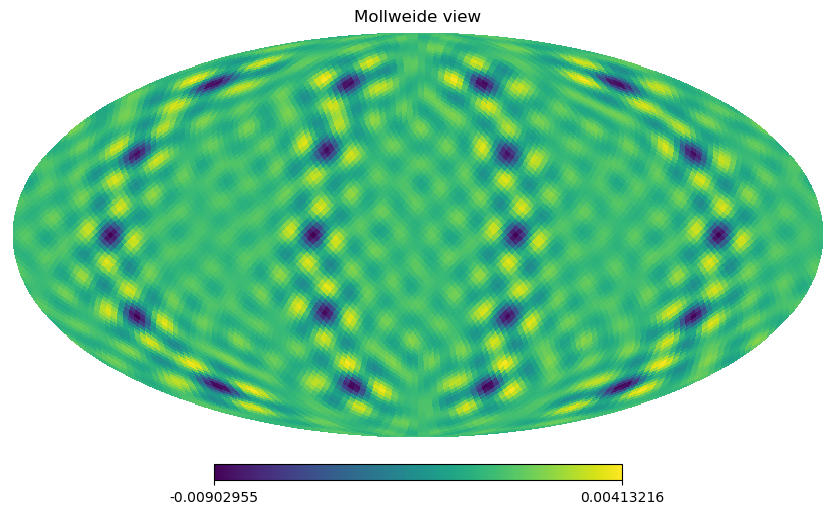

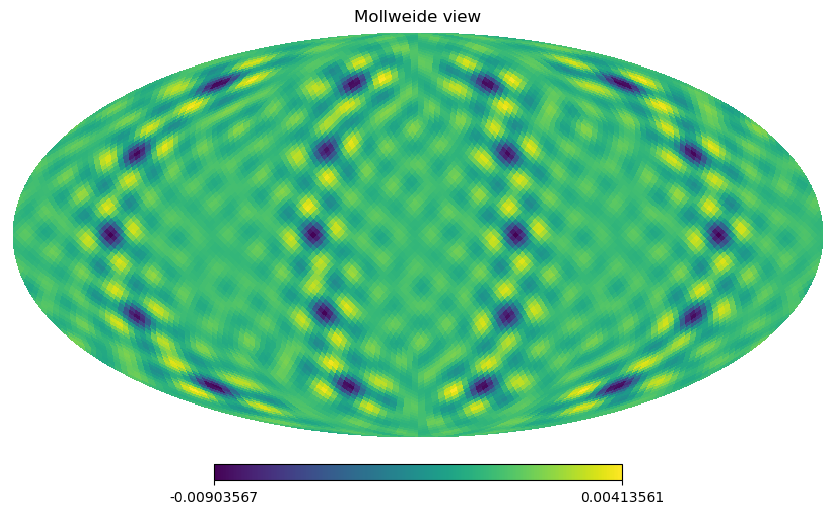

In [36]:
hp.mollview(real(conved), title = "convolved Q map")
hp.mollview(imag(conved), title = "convolved U map")